# Exploratory Data Analysis - Retail

## Data Set 

*SampleSuperstore.csv*

## Problem Statement

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Standard color for seaborn package
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [42]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [43]:
# Taking a copy of original dataframe
df1 = df.copy()

In [44]:
df1.shape

(9994, 13)

#### There are 9994 observations and 13 columns in the dataset

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Checking for null values

In [47]:
df1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### No null values in the dataset

## Five point summary of numerical features 

In [48]:
df1.describe(include = 'number')

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Observation 

For `sales`, Mean > median which tells us that it is positively skewed(right skewed). Further analysis is required as this skeweness may be because of extreme values in the sales attribute.
Min and Max values are between +-3S.D (3*623 =1869 approx). Values must be between 230-1869= -1639 and 230+1869 = 2099, 
Beyond this values those are outliers/extreme values.

For `Quantity`, Mean is almost equal to Median which means distribution is almost noraml.
Min and Max values are between +-3S.D (3*2 =6 approx). Values must be between 4-6= -2 and 4+6 = 10, Few otliers are present

For `Discount`, Mean approximatly equal to Median which means distribution is almost noraml.
Min and Max values are between +-3S.D (3*0.2 =0.6 approx). Values must be between 0.2-0.6= -0.39  and 0.2+0.6 = 0.8, looks like no otliers are present

For `Profit`,  Mean > median which tells us that it is positively skewed(right skewed). Further analysis is required as this skeweness may be because of extreme values in the Profit attribute. Looks like there are extreme values present which requires furthur analysis.

## summary of categorical features 

In [49]:
df1.describe(include = 'object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


#### Observation 

As shown in the above output, the behaviour of describe() is different with series of strings.
 Different stats were returned like count of values, unique values, top(most common value) and frequency of occurrence(the most common value’s frequency) in this case.

From this it is evident that, the West region is having the maximum sales. Office Supplies and Binders are the Categogry and Sub-Category respectively which has high sales.

In [50]:
# Checking for duplicates and droping it
df1.duplicated().sum()

17

In [51]:
df2 = df1.drop_duplicates()

In [52]:
df2.shape

(9977, 13)

In [64]:
df2['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [65]:
# `Postal Code` can be dropped as it is not used for analysis
# `Country` can be droped as the whole data is for United States

df3 =df2.drop(['Postal Code','Country'],axis =1)
df3.head(3)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714


# Visualization of the dataset

### Heatmap

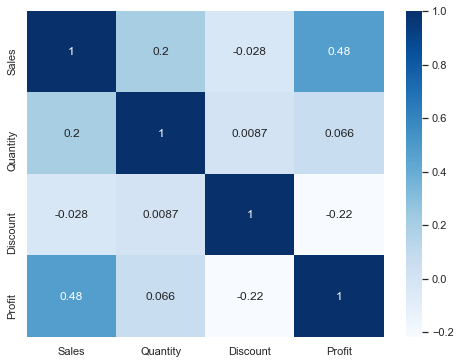

In [66]:
plt.figure(figsize =(8,6))
sns.heatmap(df3.corr(),annot =True,cmap = 'Blues')
plt.show()

### PairPlot

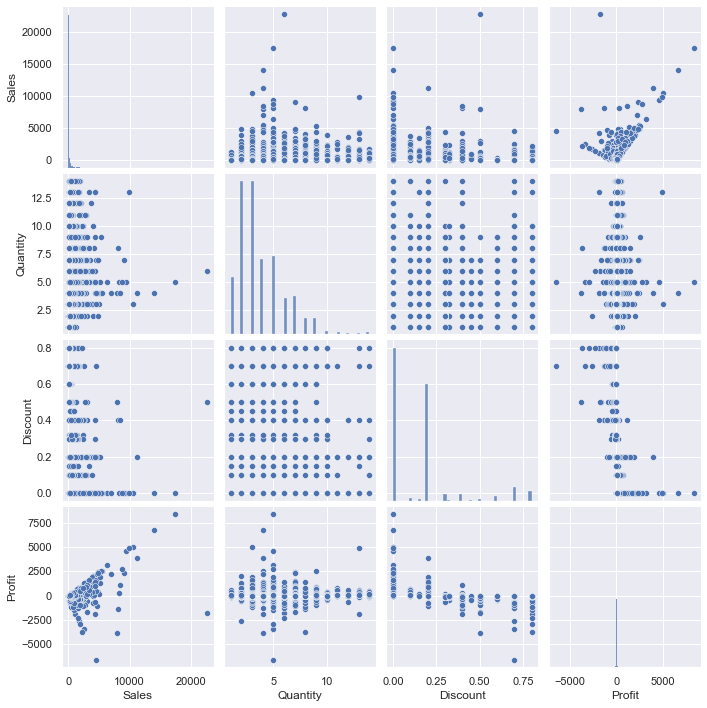

In [167]:
sns.pairplot(df3)
plt.show()

## Univariate Analysis

### Distribution of numeric variables

In [67]:
df_numeric = df3.select_dtypes(include='number')

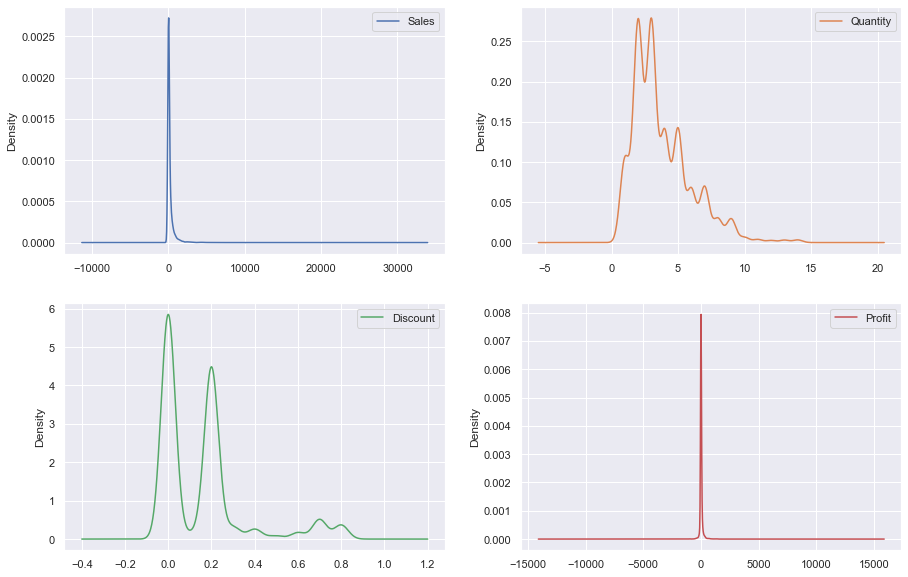

In [68]:
df_numeric.plot(kind = 'kde',subplots = True, layout = (2,2), sharex = False, figsize = (15,10))
plt.show()

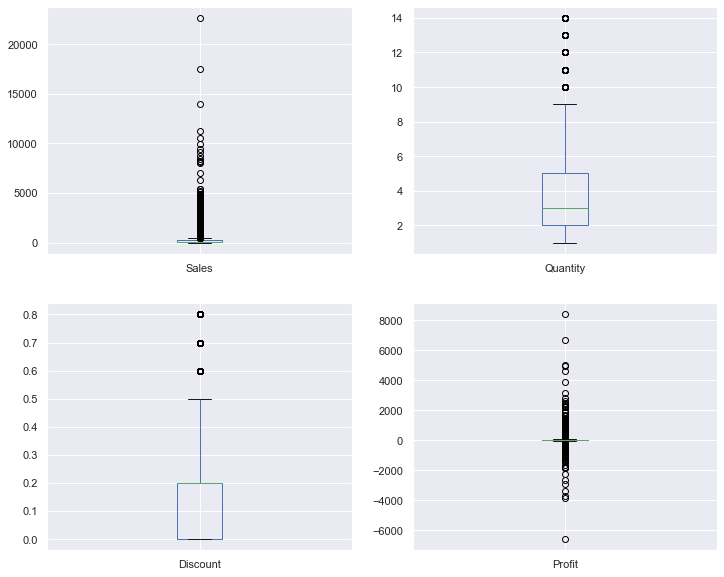

In [69]:
df_numeric.plot(kind = 'box',subplots = True, layout = (2,2),sharex = False,figsize = (12,10))
plt.show()

#### Observation 
There are many extreme values present in `Sales` , `Profit` and few are present in `Quantity` and `Discount` 

#### Now as we are focused on finding out the weak areas where we can work to make more profit. Let us Compare the `Profit` with all other features present

## Bivariate Analysis

In [218]:
# Segment vs Sales and Profit

segment_grpby = df3.groupby(by ='Segment')[['Sales','Profit']].sum().sort_values(by = ['Profit'],ascending = True)

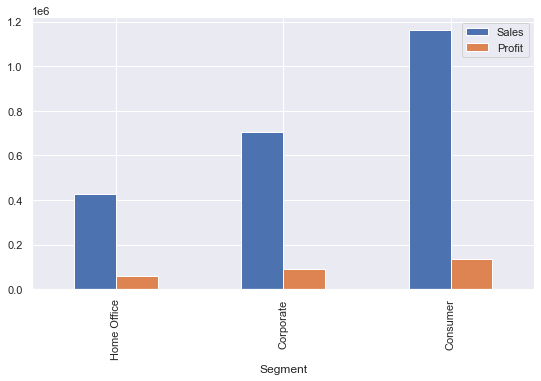

In [219]:
segment_grpby.plot(kind = 'bar',figsize =(9,5))
plt.show()

#### Observation 
Home office and Corporate Segments are having less sales compared to Consumer Segment. So to increase profit they need to focus more on Home office and Corporate Segments

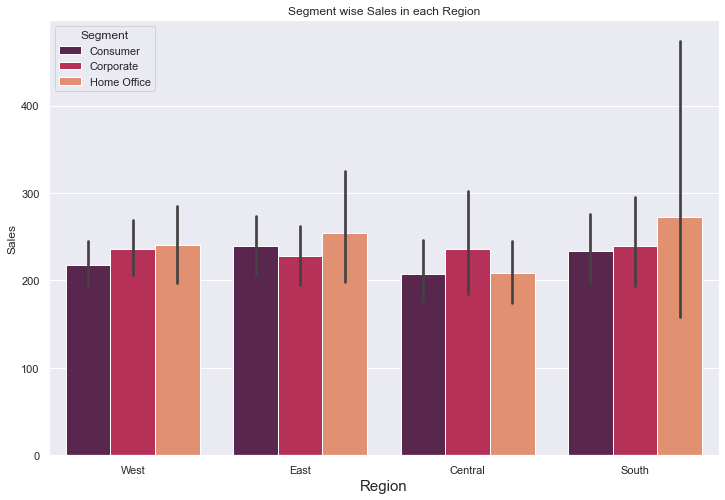

In [228]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df3,hue='Segment',order=df3['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

#### Observation 6 
Segment wise sales are almost same in every region

In [215]:
# Category vs Sales and Profit

category_grpby = df3.groupby(by ='Category')[['Sales','Profit']].sum()
sort_profit1 = category_grpby.sort_values(by = ['Profit'],ascending = True)

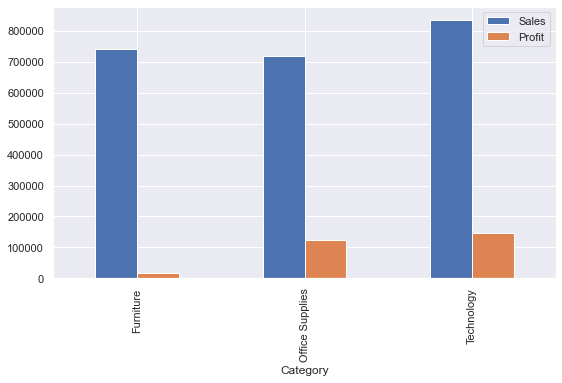

In [214]:
sort_profit1.plot(kind = 'bar',figsize =(9,5))
plt.show()

#### Observation 
All 3 categories are doing good in sales but Furniture is having very less Profit compared to office Supplies and Technology

In [220]:
# Sub_Category vs Sales and Profit

subcategory_grpby = df3.groupby(by ='Sub-Category')[['Sales','Profit']].sum()
sort_profit2 = subcategory_grpby.sort_values(by = ['Profit'],ascending = True)

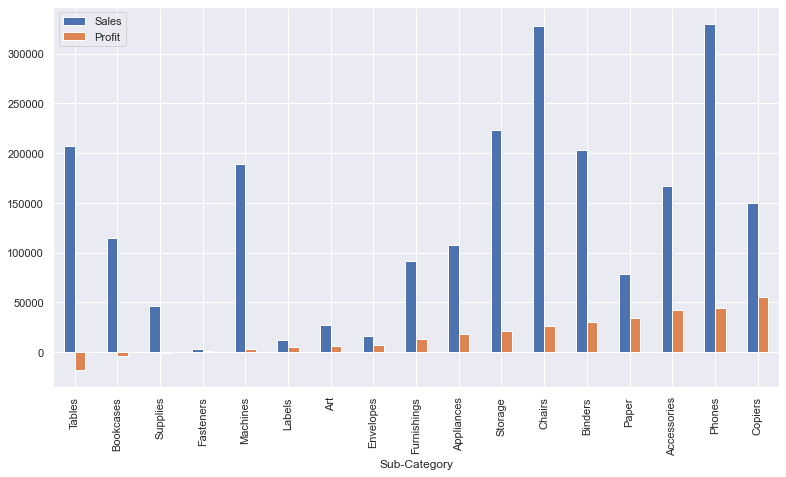

In [221]:
sort_profit2.plot(kind = 'bar',figsize =(13,7))
plt.show()

#### Observation 
From the above plot , Though there is an average amount of sales for subcategories like Tables, Bookcases they are on loss.For Supplies and Fasteners there is no profit as sales is very less. Phones and Chaires are having high sales but having less profit.

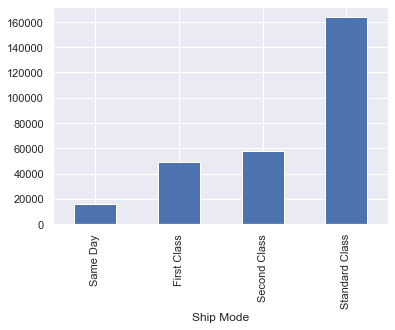

In [151]:
# Ship Mode vs Profit

df3.groupby(by ='Ship Mode')['Profit'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.show()

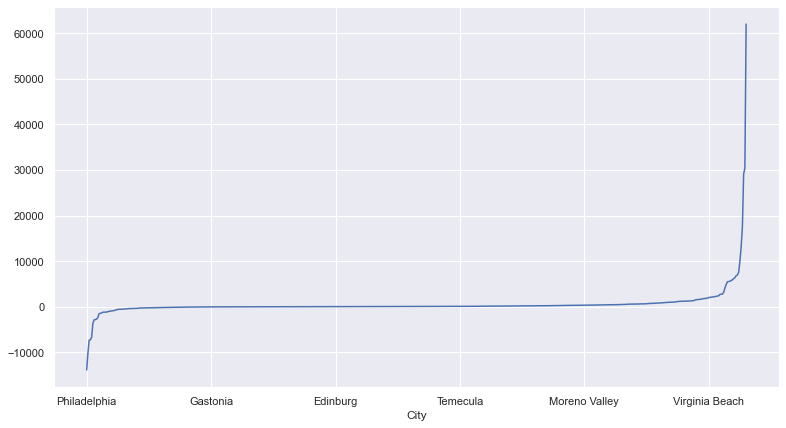

In [199]:
# sns.lineplot(x= 'City', y ='Profit',data = df3)
plt.figure(figsize =(13,7))
df3.groupby(by ='City')['Profit'].sum().sort_values(ascending = True).plot()
plt.show()

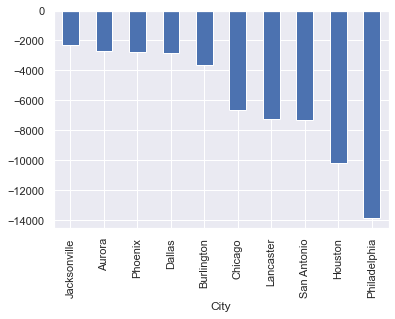

In [164]:
# City vs Profit : 10 cities having the least profit 
df3.groupby(by ='City')['Profit'].sum().sort_values(ascending = False)[521:].plot(kind = 'bar')
plt.show()

#### Observation 
Inorder to increase the `Profit`. We should focus more on the above cities. Philadelphia is having the least profit among all cities.

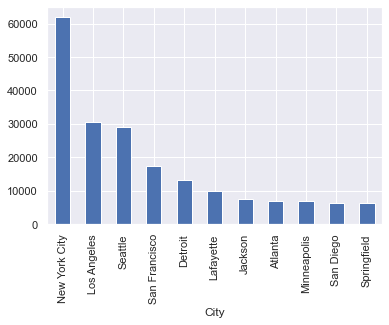

In [166]:
# City vs Profit : 10 cities having high profit 
df3.groupby(by ='City')['Profit'].sum().sort_values(ascending = False)[:11].plot(kind = 'bar')
plt.show()

#### Observation 
New York City is having the highest profit among all cities

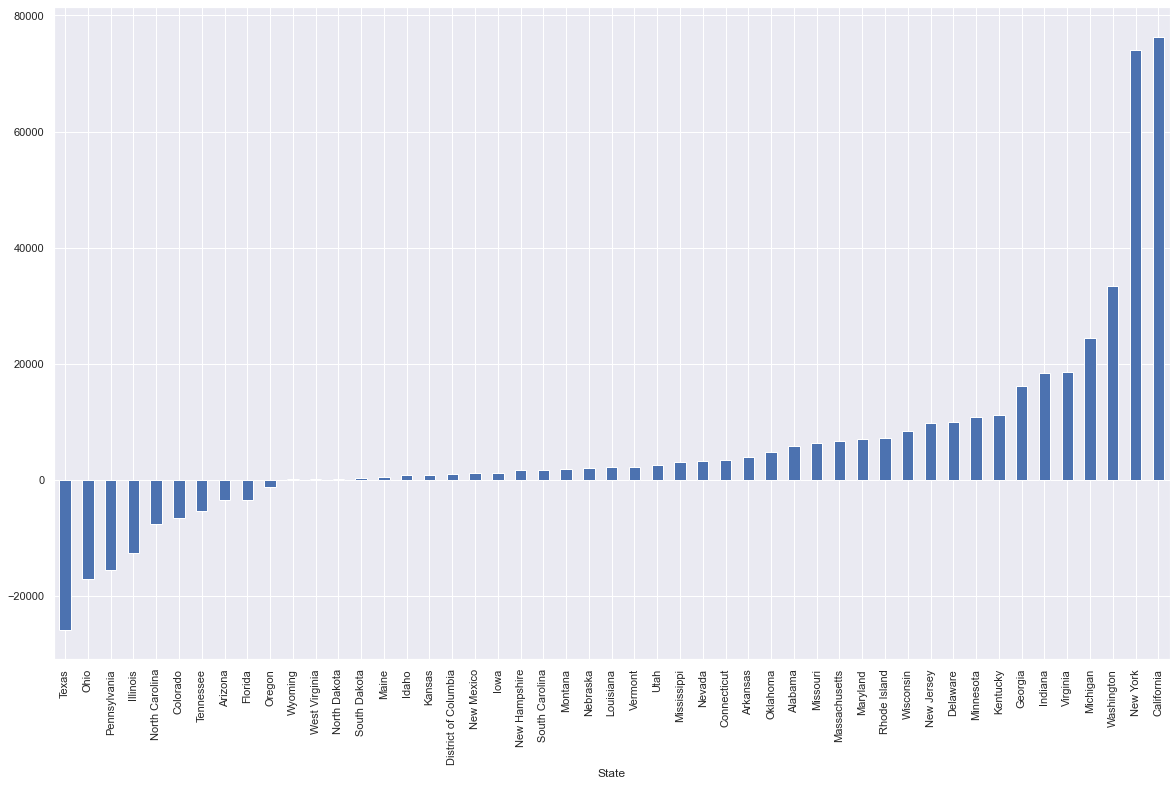

In [201]:
# State vs Profit
plt.figure(figsize =(20,12))
df3.groupby(by ='State')['Profit'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.show()

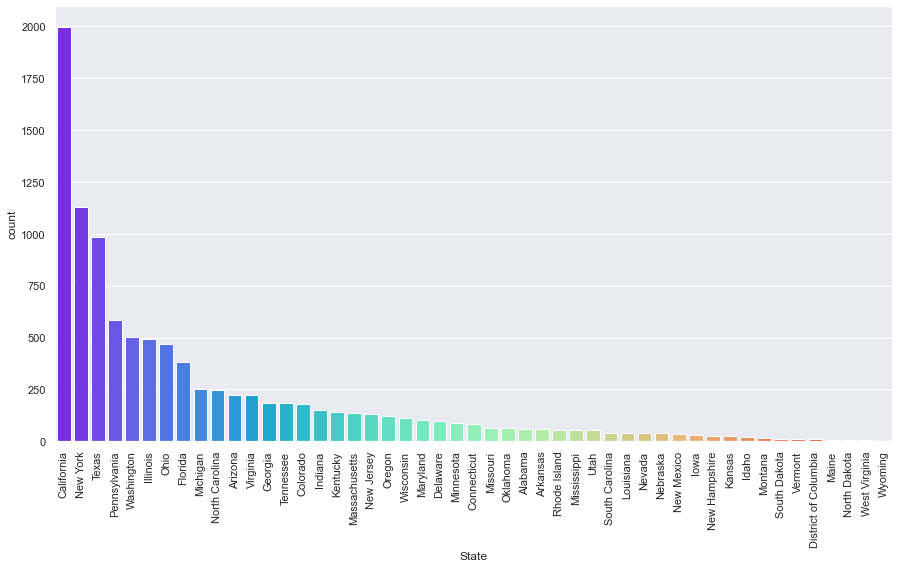

In [225]:
plt.figure(figsize=(15,8))
sns.countplot(x='State',data=df3,palette='rainbow',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


#### Observation 
Highest number of buyers are from California and New York

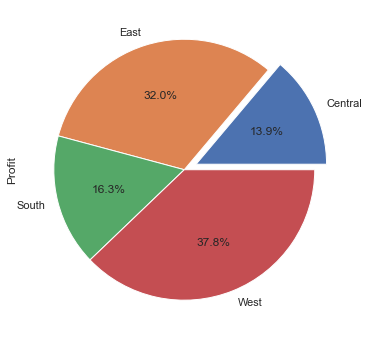

In [192]:
# Region vs Profit : 

plt.figure(figsize =(8,6))
df3.groupby(by ='Region')['Profit'].sum().plot(kind = 'pie',autopct='%1.1f%%',explode=(0.1, 0, 0,0))
plt.show()

#### Observation 
Central is the region which has least Profit followed by South

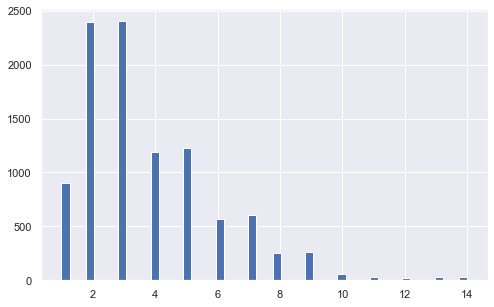

In [227]:
df3['Quantity'].hist(figsize=(8,5),bins=50)
plt.show()

#### Observation
Most customers tends to buy quantity of 2 and 3 <br>

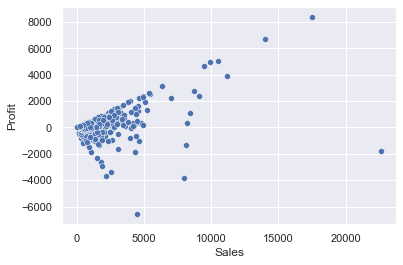

In [207]:
# Sales vs Profit

sns.scatterplot(x= 'Sales', y ='Profit', data =df3)
plt.show()

#### Observation 
There is weak positive correlation between Sales and Profit.

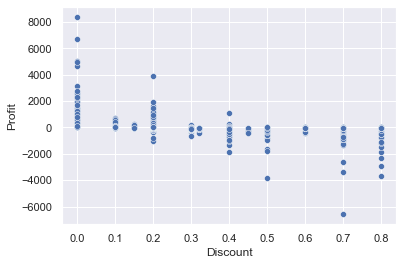

In [210]:
# Discount vs Profit

sns.scatterplot(x= 'Discount', y ='Profit', data =df3)
plt.show()

In [211]:
df3[['Discount','Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.219662
Profit,-0.219662,1.000000


#### Observation 
There is a negative correlation between Discount and Profit. As discount increases Profit decreases.

Maximum Discount given is 0 to 20 percent

# Thank you!